<a href="https://colab.research.google.com/github/DantonCoote/My_Hub/blob/DeepLearning/Assign_2_Group_9_NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2, Fruit Classification

## Step 1.1, Loading and cleaning our Data

In [1]:
import pandas as pd

#beginning by loading our data
data = pd.read_csv('Date_Fruit_Datasets.csv')
data.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091220e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


There is a lot of data here! 34 columns and we see that there is some large deviations in our data, this is good as it will make training a classifier easier.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

Looking good for our data, no null values should be within it and we have a label known as Class that will help train accuracy

In [3]:
#Checking for duplicates
dups = data.duplicated()
for i in dups:
  if i == True:
    print("There are duplicates")
    break

With no output we can assume there are no duplicates

## Step 1.2, Data Exploration

<Axes: >

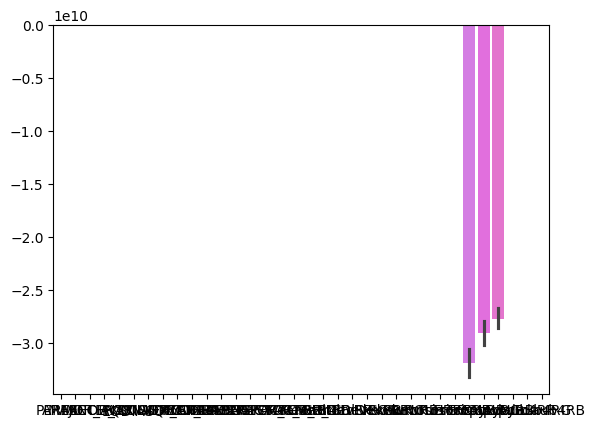

In [4]:
import seaborn as sb

sb.barplot(data)

This bar plot, though weird looking, shows that our data is not very well scaled. We have a wide variety of ranges for our numerical data which makes our bar plot seeem very scewed. We will need to scale the data before using it train a model or else we will have very inaccurate results (Speaking from experience)

In [5]:
#moving labels to dataframe
labels = data['Class']

#dropping labels from original dataframe
data_mod = data.drop('Class', axis=1)

In [6]:
# Confirming
print(data_mod.info)
labels[:5]

<bound method DataFrame.info of        AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0    422163  2378.9080    837.8484    645.6693        0.6373  733.1539   
1    338136  2085.1440    723.8198    595.2073        0.5690  656.1464   
2    526843  2647.3940    940.7379    715.3638        0.6494  819.0222   
3    416063  2351.2100    827.9804    645.2988        0.6266  727.8378   
4    347562  2160.3540    763.9877    582.8359        0.6465  665.2291   
..      ...        ...         ...         ...           ...       ...   
893  255403  1925.3650    691.8453    477.1796        0.7241  570.2536   
894  365924  2664.8230    855.4633    551.5447        0.7644  682.5752   
895  254330  1926.7360    747.4943    435.6219        0.8126  569.0545   
896  238955  1906.2679    716.6485    441.8297        0.7873  551.5859   
897  343792  2289.2720    823.8438    534.7757        0.7607  661.6113   

     SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  SkewRB  KurtosisRR  \
0 

,Class
0,BERHI
1,BERHI
2,BERHI
3,BERHI
4,BERHI


Everything looks good! We can move to the next phase of development.

## Step 1.3, Scaling and splitting our data

In [7]:
from sklearn import model_selection

# splitting our data into training, validation, and testing variables
# splitting
train_x, rem_x, train_y, rem_y = model_selection.train_test_split(data_mod, labels, train_size=0.8)
test_x, val_x, test_y, val_y = model_selection.train_test_split(rem_x, rem_y, train_size=0.5)

In [8]:
# ensuring fair splits
print(len(train_x), "\n", len(test_x))

718 
 90


Quickly thinking about this..... 897 total entries so 718 is around 80% of our data and 90 is about 10%. Looks good!

In [9]:
from sklearn import preprocessing

#initializing a scaler
scalar = preprocessing.MinMaxScaler()

# Scaling data
train_x = scalar.fit_transform(train_x)
test_x = scalar.transform(test_x)
val_x = scalar.transform(val_x)

In [10]:
from sklearn.preprocessing import LabelEncoder

# enabling the encoder, from what I understand it automatically readjusts all labels from string
# to numerical labels
encoder = LabelEncoder()

train_y = encoder.fit_transform(train_y)
test_y = encoder.transform(test_y)
val_y = encoder.transform(val_y)

In [11]:
print(len(labels.unique()))

7


In [12]:
import keras

train_y = keras.utils.to_categorical(train_y, 7)
test_y = keras.utils.to_categorical(test_y, 7)
val_y = keras.utils.to_categorical(val_y, 7)

We are scaling the data to ensure all our datapoints are on the same scale, standardizing all the measurements of the dataset. We also split our data into Training, Testing, and Validation sets. We also encode our lables for easier usage in our classifier. <br>
I am still trying to understand what exactly encoding does entirely as a whole. This is something we aren't covering in class at the moment and may not as we are studying with an earlier version of Tensorflow.

## Step 2.1, Model Selection and Training

In [13]:
#Time to initialize an initial model
from keras import models
model = models.Sequential()

In [14]:
# using a pandas dataframe to store important metrics
stats = pd.DataFrame(columns=['Model', 'Validation Accuracy', 'Validation Loss', 'Confusion Matrix'])
model_in = 0 # a global index I plan on using for recording every model made

# building manually as I cannot be bothered to think about doing this in an automated fashion

#### Model 1

In [15]:
# beginning the building of our NN

model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=7, activation='softmax'))

# Cool part is Dense layers are really flexible in this version of Keras so no
# input layer or shape specifications are needed

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# this is training our model completely
history = model.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=10)
# storing the output for info gathering later!

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.4374 - loss: 1.7454 - val_accuracy: 0.6333 - val_loss: 1.1805
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6514 - loss: 1.0272 - val_accuracy: 0.6667 - val_loss: 0.7582
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7272 - loss: 0.7157 - val_accuracy: 0.8000 - val_loss: 0.6177
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7785 - loss: 0.5436 - val_accuracy: 0.7222 - val_loss: 0.7142
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7770 - loss: 0.5000 - val_accuracy: 0.7889 - val_loss: 0.5266
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8330 - loss: 0.4286 - val_accuracy: 0.8000 - val_loss: 0.5597
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8030 - loss: 0.4648 - val_accuracy: 0.8000 - val_loss: 0.5004
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8282 - loss: 0.4050 - val_accuracy: 0.8222 - val

In [18]:
# printing out a summary of our compiled model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,791 (659.34 KB)

 Trainable params: 56,263 (219.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 112,528 (439.57 KB)

In [19]:
#importing for gathering confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix

In [20]:
# gathering data step for later comparison

model_iteration = 'Model 1'
acc = history.history['val_accuracy'][-1]
loss = history.history['val_loss'][-1]

# After training the model, get predictions on the validation set
val_preds = model.predict(val_x)

# Convert predicted probabilities to class labels
val_pred_classes = np.argmax(val_preds, axis=1)
val_y_classes = np.argmax(val_y, axis=1)

# Compute the confusion matrix
con_max = confusion_matrix(val_y_classes, val_pred_classes)

stats.loc[model_in] = [model_iteration, acc, loss, con_max]
model_in = model_in+1 #moving index up one

# for reference of column order
#['Model', 'Validation Accuracy', 'Validation Loss', 'Confusion Matrix']

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


### Cool results, now lets keep playing!
My group partner and I went through this step proposing different tests to see what would happen when a given hyperparameter was changed or new layers were added/altered

#### Model 2

In [21]:
model2 = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(125, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

In [22]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
# second attempt at fresh model design
history = model2.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=25)

Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.3140 - loss: 1.7466 - val_accuracy: 0.6222 - val_loss: 1.0903
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6637 - loss: 1.0001 - val_accuracy: 0.7667 - val_loss: 0.6394
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7639 - loss: 0.6383 - val_accuracy: 0.7778 - val_loss: 0.5510
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7974 - loss: 0.5418 - val_accuracy: 0.7222 - val_loss: 0.6047
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8370 - loss: 0.4621 - val_accuracy: 0.8111 - val_loss: 0.4902
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8332 - loss: 0.4330 - val_accuracy: 0.8111 - val_loss: 0.4294
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8219 - loss: 0.4282 - val_accuracy: 0.7444 - val_loss: 0.5708
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8193 - loss: 0.4470 - val_accuracy: 0.8111 - v

In [24]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 512)                 │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 125)                 │          32,125 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │             882 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 546,767 (2.09 MB)

 Trainable params: 182,255 (711.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364,512 (1.39 MB)

In [25]:
# gathering data step for later comparison

model_iteration = 'Model 2'
acc = history.history['val_accuracy'][-1]
loss = history.history['val_loss'][-1]

# After training the model, get predictions on the validation set
val_preds = model2.predict(val_x)

# Convert predicted probabilities to class labels
val_pred_classes = np.argmax(val_preds, axis=1)
val_y_classes = np.argmax(val_y, axis=1)

# Compute the confusion matrix
con_max = confusion_matrix(val_y_classes, val_pred_classes)

stats.loc[model_in] = [model_iteration, acc, loss, con_max]
model_in = model_in+1 #moving index up one

# for reference of column order
#['Model', 'Validation Accuracy', 'Validation Loss', 'Confusion Matrix']

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


#### Model 3

In [26]:
model3 = models.Sequential()

model3.add(keras.layers.Dense(units=128, activation='relu'))
model3.add(keras.layers.Dense(units=256, activation='relu'))
model3.add(keras.layers.Dense(units=64, activation='relu'))
model3.add(keras.layers.Dense(units=32, activation='relu'))
model3.add(keras.layers.Dense(units=7, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Seeing how more epochs affects our first model
history = model3.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3292 - loss: 1.8262 - val_accuracy: 0.6000 - val_loss: 1.4268
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6258 - loss: 1.2675 - val_accuracy: 0.6556 - val_loss: 0.9738
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7126 - loss: 0.8154 - val_accuracy: 0.7111 - val_loss: 0.7297
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7876 - loss: 0.5515 - val_accuracy: 0.7556 - val_loss: 0.6484
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7891 - loss: 0.5364 - val_accuracy: 0.7556 - val_loss: 0.6860
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8139 - loss: 0.5069 - val_accuracy: 0.8111 - val_loss: 0.5726
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8425 - loss: 0.4151 - val_accuracy: 0.8222 - val_loss: 0.4805
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8279 - loss: 0.3902 - val_accuracy: 0.8222 - val_loss

In [28]:
# Seems more epochs can improve our accuracy, though the gains are limited
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168,791 (659.34 KB)

 Trainable params: 56,263 (219.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 112,528 (439.57 KB)

In [29]:
# gathering data step for later comparison

model_iteration = 'Model 3'
acc = history.history['val_accuracy'][-1]
loss = history.history['val_loss'][-1]

# After training the model, get predictions on the validation set
val_preds = model3.predict(val_x)

# Convert predicted probabilities to class labels
val_pred_classes = np.argmax(val_preds, axis=1)
val_y_classes = np.argmax(val_y, axis=1)

# Compute the confusion matrix
con_max = confusion_matrix(val_y_classes, val_pred_classes)

stats.loc[model_in] = [model_iteration, acc, loss, con_max]
model_in = model_in+1 #moving index up one

# for reference of column order
#['Model', 'Validation Accuracy', 'Validation Loss', 'Confusion Matrix']

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


#### Model 4

In [30]:
model4 = models.Sequential()

model4.add(keras.layers.Dense(units=128, activation='relu'))
model4.add(keras.layers.Dense(units=256, activation='relu'))
model4.add(keras.layers.Dense(units=64, activation='relu'))
model4.add(keras.layers.Dense(units=32, activation='relu'))
model4.add(keras.layers.Dense(units=7, activation='softmax'))

model4.compile(optimizer='lion', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# testing a different optimizer!
history = model4.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4331 - loss: 1.7170 - val_accuracy: 0.6333 - val_loss: 1.1298
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6621 - loss: 0.9270 - val_accuracy: 0.7556 - val_loss: 0.6232
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7609 - loss: 0.5812 - val_accuracy: 0.7556 - val_loss: 0.5509
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8139 - loss: 0.4711 - val_accuracy: 0.7667 - val_loss: 0.6621
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8467 - loss: 0.4121 - val_accuracy: 0.7667 - val_loss: 0.6750
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8592 - loss: 0.4021 - val_accuracy: 0.8222 - val_loss: 0.5187
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8649 - loss: 0.3363 - val_accuracy: 0.8111 - val_loss: 0.5158
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8629 - loss: 0.3592 - val_accuracy: 0.8111 - val_loss

In [32]:
# seems the lion optimizer is good at its job!
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 128)                 │           4,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,528 (439.57 KB)

 Trainable params: 56,263 (219.78 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 56,265 (219.79 KB)

In [33]:
# gathering data step for later comparison

model_iteration = 'Model 4'
acc = history.history['val_accuracy'][-1]
loss = history.history['val_loss'][-1]

# After training the model, get predictions on the validation set
val_preds = model4.predict(val_x)

# Convert predicted probabilities to class labels
val_pred_classes = np.argmax(val_preds, axis=1)
val_y_classes = np.argmax(val_y, axis=1)

# Compute the confusion matrix
con_max = confusion_matrix(val_y_classes, val_pred_classes)

stats.loc[model_in] = [model_iteration, acc, loss, con_max]
model_in = model_in+1 #moving index up one

# for reference of column order
#['Model', 'Validation Accuracy', 'Validation Loss', 'Confusion Matrix']

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


#### Model 5

In [34]:
# making a crazy experiment with this one!! Using Abi's baby with Lion!
# will learn more layers eventually!
model5 = keras.models.Sequential([
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(7, activation='softmax')
])

# we have way more loss functions than I originally thought!
model5.compile(optimizer='lion', loss='categorical_focal_crossentropy', metrics=['accuracy'])

In [35]:
history = model5.fit(train_x, train_y, validation_data=(val_x,val_y), epochs=20, batch_size=25)

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4103 - loss: 0.2776 - val_accuracy: 0.7111 - val_loss: 0.0926
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7377 - loss: 0.0870 - val_accuracy: 0.7889 - val_loss: 0.0816
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7791 - loss: 0.0604 - val_accuracy: 0.7444 - val_loss: 0.0709
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8122 - loss: 0.0500 - val_accuracy: 0.8444 - val_loss: 0.0526
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7859 - loss: 0.0489 - val_accuracy: 0.8333 - val_loss: 0.0481
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7968 - loss: 0.0442 - val_accuracy: 0.8111 - val_loss: 0.0421
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8305 - loss: 0.0403 - val_accuracy: 0.8333 - val_loss: 0.0497
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8263 - loss: 0.0400 - val_accuracy: 0.8556 - val_loss

In [36]:
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 1024)                │          35,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 630,288 (2.40 MB)

 Trainable params: 315,143 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 315,145 (1.20 MB)

In [37]:
# gathering data step for later comparison

model_iteration = 'Model 5'
acc = history.history['val_accuracy'][-1]
loss = history.history['val_loss'][-1]

# After training the model, get predictions on the validation set
val_preds = model5.predict(val_x)

# Convert predicted probabilities to class labels
val_pred_classes = np.argmax(val_preds, axis=1)
val_y_classes = np.argmax(val_y, axis=1)

# Compute the confusion matrix
con_max = confusion_matrix(val_y_classes, val_pred_classes)

stats.loc[model_in] = [model_iteration, acc, loss, con_max]
model_in = model_in+1 #moving index up one

# for reference of column order
#['Model', 'Validation Accuracy', 'Validation Loss', 'Confusion Matrix']

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


## Step 2.2, Choosing the best model

In [38]:
print(stats)

     Model  Validation Accuracy  Validation Loss  \
0  Model 1             0.844444         0.435869   
1  Model 2             0.766667         0.541642   
2  Model 3             0.866667         0.384923   
3  Model 4             0.866667         0.445916   
4  Model 5             0.833333         0.037262   

                                    Confusion Matrix  
0  [[1, 0, 0, 3, 2, 0, 0], [0, 10, 1, 0, 0, 1, 2]...  
1  [[4, 0, 0, 2, 0, 0, 0], [0, 2, 0, 0, 0, 1, 11]...  
2  [[2, 0, 0, 3, 1, 0, 0], [0, 9, 1, 0, 1, 1, 2],...  
3  [[4, 0, 0, 2, 0, 0, 0], [0, 10, 1, 0, 0, 1, 2]...  
4  [[4, 0, 0, 1, 1, 0, 0], [0, 6, 2, 0, 0, 0, 6],...  


#### Which model is best?
Model 3 seems to be our best one? Were the others overfitting? Possibly! But with these results we see that Model 3 looks like our best result BUT Model 4 was a star in training and we feel we cannot discount that fact, so we are testing both for Models for accuracy

## Step 2.3, Testing Models 3 and 4

In [41]:
from sklearn.metrics import accuracy_score
# After training the model, get predictions on the validation set
test_preds = model3.predict(test_x)


# Convert predicted probabilities to class labels, Learning why this is needed still
# potentially something that is apart of newer Keras
test_pred_classes = np.argmax(test_preds, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

# Computing accuracy
acc = accuracy_score(test_y_classes, test_pred_classes)

# Compute the confusion matrix
con_max = confusion_matrix(test_y_classes, test_pred_classes)

# Printing scores
print('Accuracy: ', acc, '\nConfusion Matrix:\n', con_max)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy:  0.8666666666666667 
Confusion Matrix:
 [[ 5  0  0  1  3  0  0]
 [ 0 10  1  0  0  0  1]
 [ 0  0 18  0  0  0  0]
 [ 2  0  0  4  0  0  0]
 [ 0  1  0  0 12  0  0]
 [ 0  0  0  0  0 23  0]
 [ 0  2  0  0  1  0  6]]


In [42]:
# After training the model, get predictions on the validation set
test_preds = model4.predict(test_x)


# Convert predicted probabilities to class labels, Learning why this is needed still
# potentially something that is apart of newer Keras
test_pred_classes = np.argmax(test_preds, axis=1)
test_y_classes = np.argmax(test_y, axis=1)

# Computing accuracy
acc = accuracy_score(test_y_classes, test_pred_classes)

# Compute the confusion matrix
con_max = confusion_matrix(test_y_classes, test_pred_classes)

# Printing scores
print('Accuracy: ', acc, '\nConfusion Matrix:\n', con_max)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy:  0.9 
Confusion Matrix:
 [[ 8  0  0  1  0  0  0]
 [ 0 10  1  0  0  0  1]
 [ 0  1 17  0  0  0  0]
 [ 1  0  0  5  0  0  0]
 [ 0  1  0  0 12  0  0]
 [ 0  0  0  0  0 23  0]
 [ 0  3  0  0  0  0  6]]


## Step 3.1, Conclusions

### Model 4 is our champion!
We feel Model 4 is our best due to the massive jump in accuracy. Why is preforms better for the Test data versus Model 3, which preforms similar to it's validation scores, is interesting and something neither of us can fully explain at the moment. Judging from the confusion matrices, Model 4 simply has fewer false categorizations in a few categories. Overall Model 4 has fewer mistakes, suggesting it has better decision boundaries for for fruits that are on the boundaries of our classifications. We likely could have seent this better if I had printed the Confusion Matrices out in a more readable manor! Lesson learned for next time!

## Step 3.2, Use case preformance?
Well, with an accuracy of 90% and a a confusion matrix that shows us that this model has well defined descision boundaries for it labels we can assume that this model would preform well in the real world. Perhaps having more data to ensure accuracy would be nice. We are hesitant to say that this model is prefect for it's role as statistically it will misplace 1/10 fruits if used in sorting but for basic identification purposes it should be an effective solution. <br>
If we are using this solution for low risk sorting, like potato qualities, this model is effective but if this model is being deployed to prevent cross contamination of allergens, specifically considering peanuts in this hypathetical, this model would be inadequate as the risk may be too great for a cross contamination event. <br>
<br>Low Risk applications: Acceptable<br>
High Risk applications: Further improvement is required